# Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset

In [2]:
# Load the dataset
bank_full_path = 'Dataset/bank-full.csv'
bank_data = pd.read_csv(bank_full_path, delimiter=';')
original_bank_data = bank_data.copy()  # Copy for later visualization

In [3]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA and Visualization

In [4]:
print("Dataset Shape:", bank_data.shape)

Dataset Shape: (45211, 17)


In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
print("Missing Values:")
bank_data.isnull().sum()

Missing Values:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
print("Value Counts of the Target Variable:\n", bank_data['y'].value_counts())

Value Counts of the Target Variable:
 y
no     39922
yes     5289
Name: count, dtype: int64


### Distribution Plots for Key Features

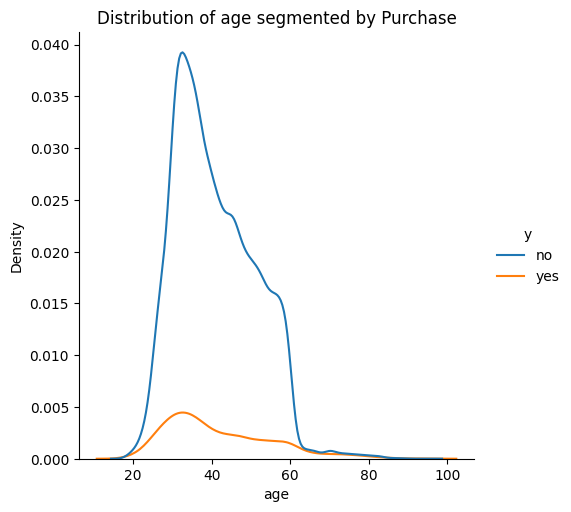

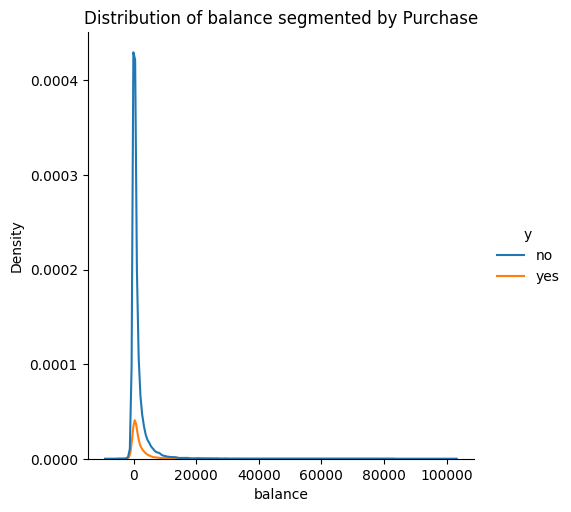

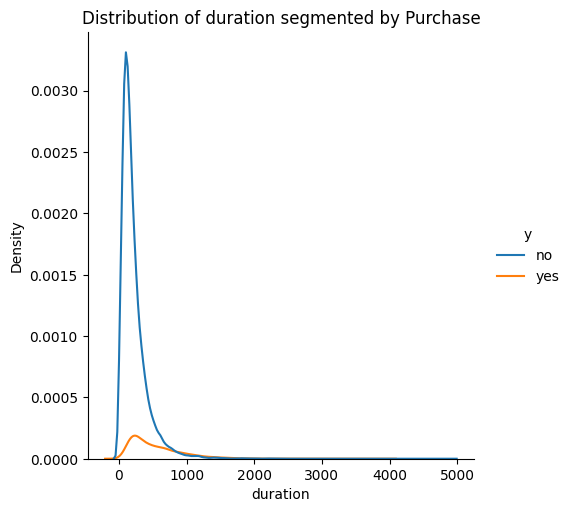

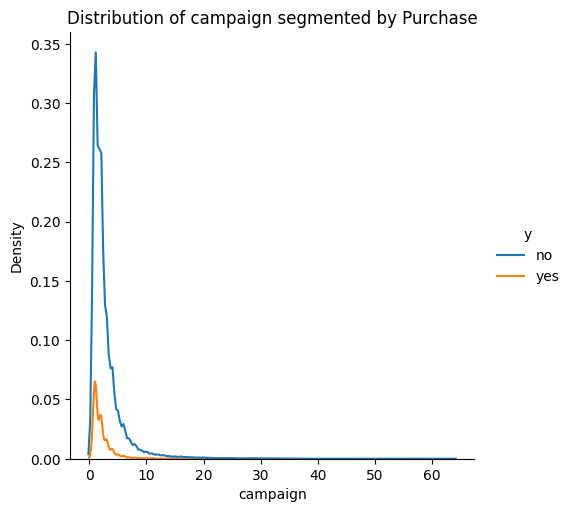

In [8]:
# Distribution Plots for Key Features
for column in ['age', 'balance', 'duration', 'campaign']:
    sns.displot(original_bank_data, x=column, hue='y', kind='kde')
    plt.title(f'Distribution of {column} segmented by Purchase')
    plt.show()

### Bar Plots for Original Categorical Features (before encoding)

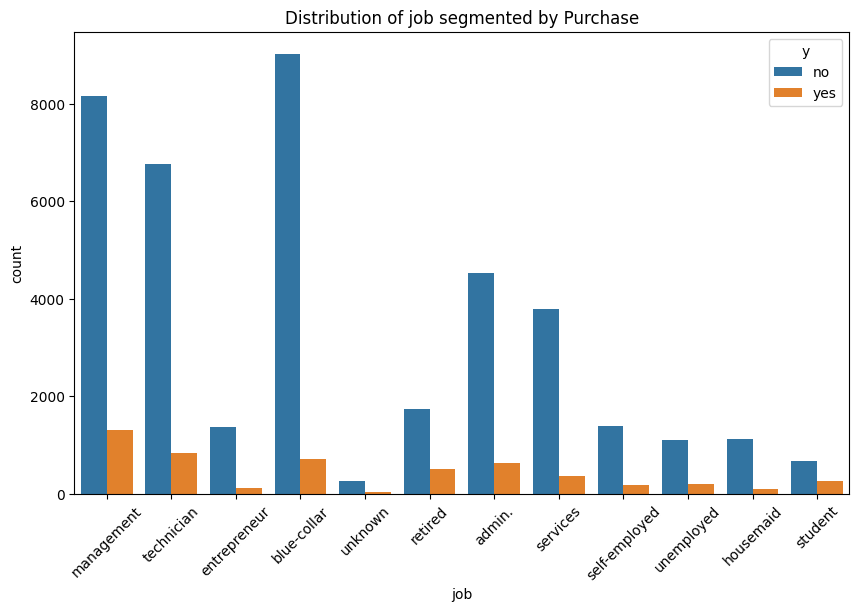

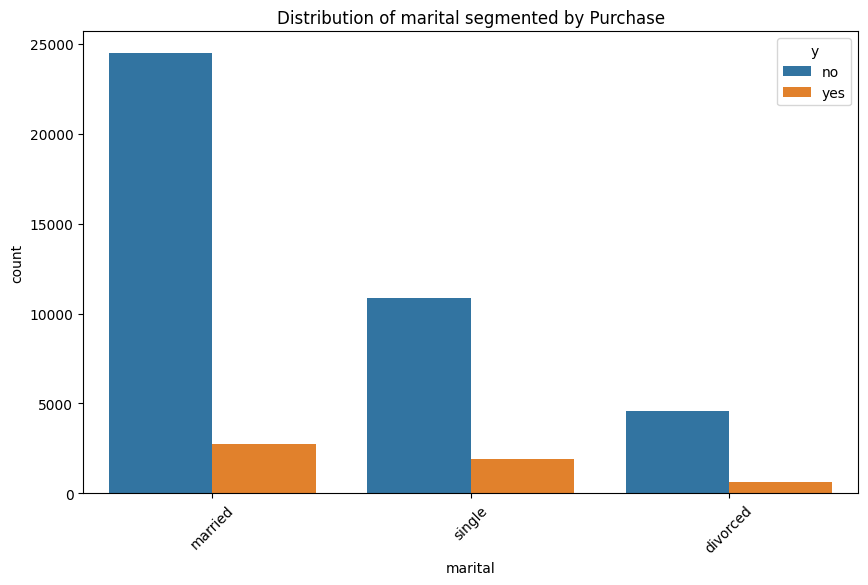

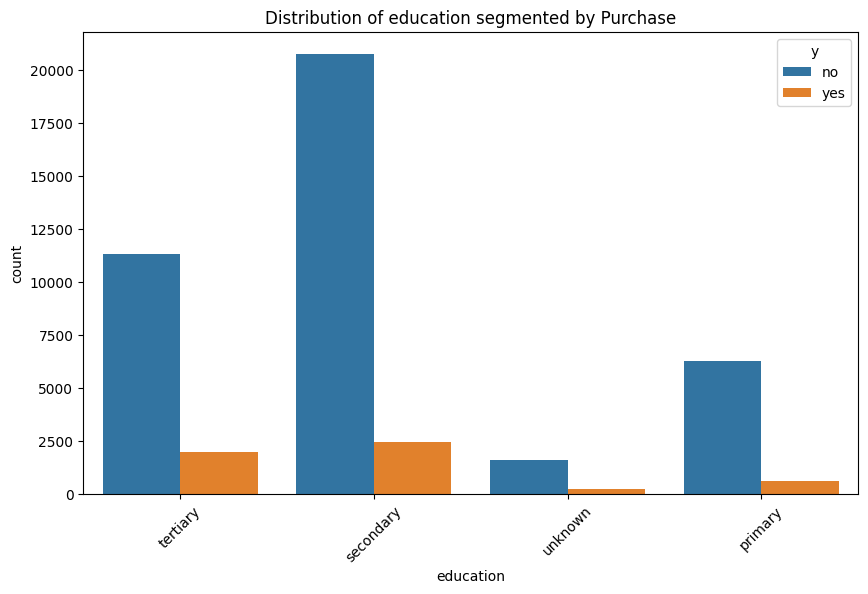

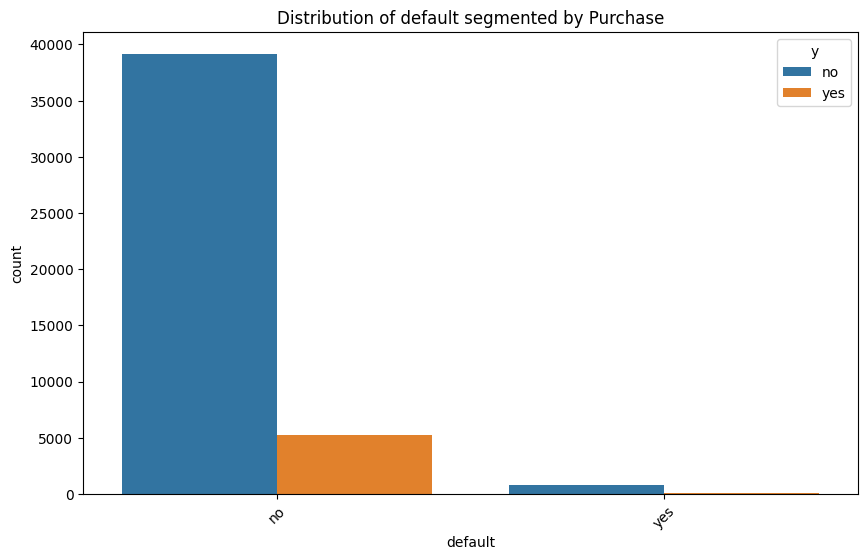

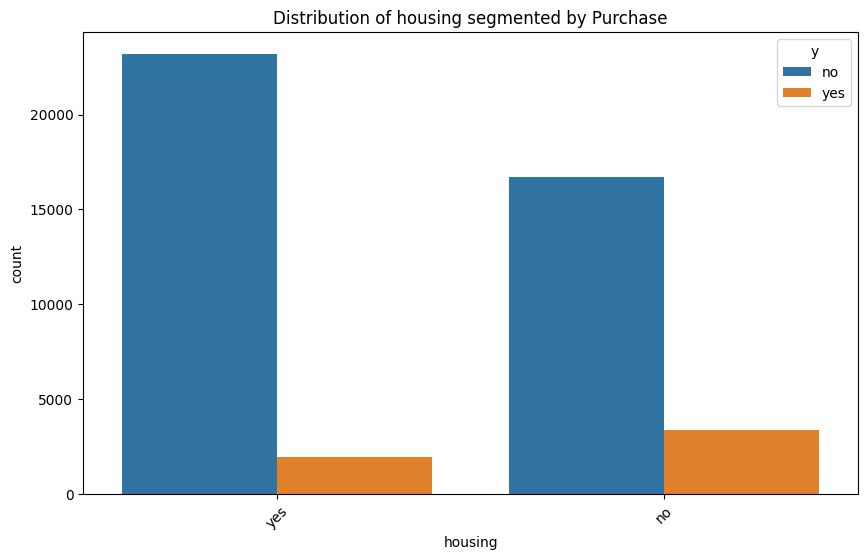

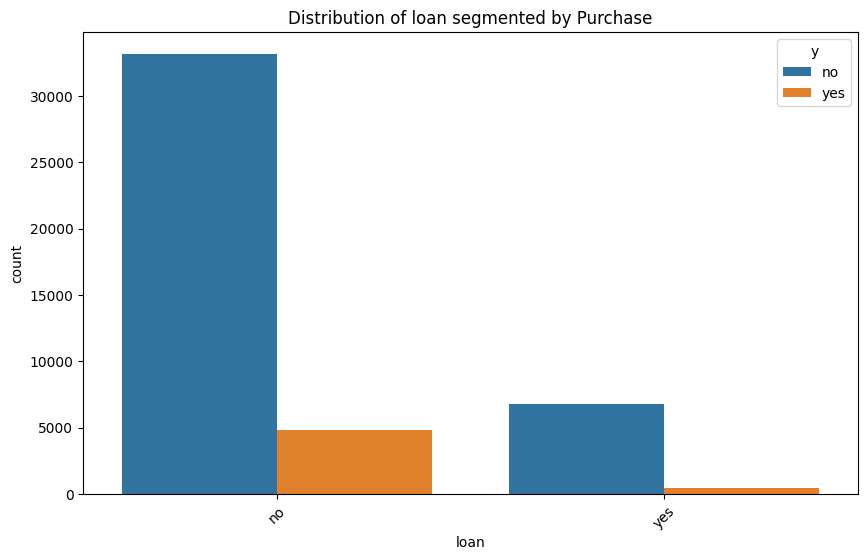

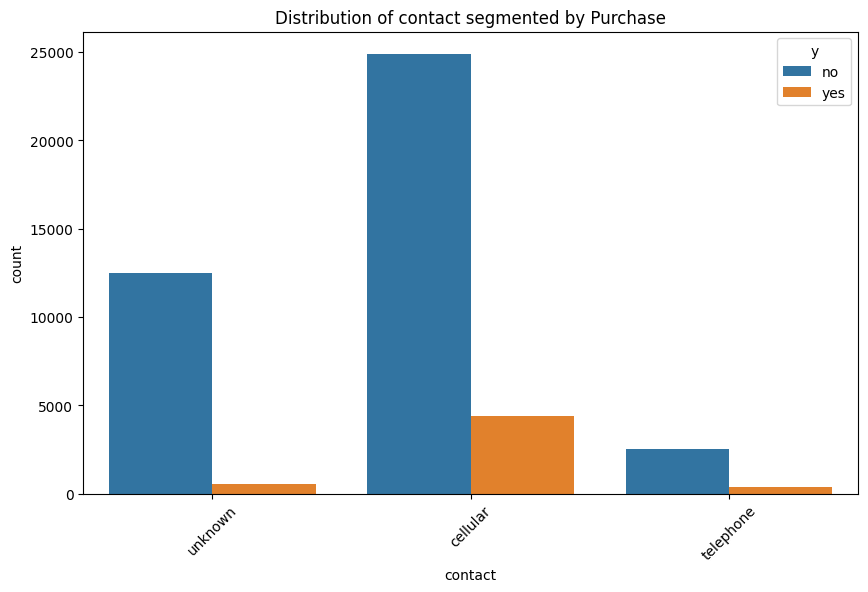

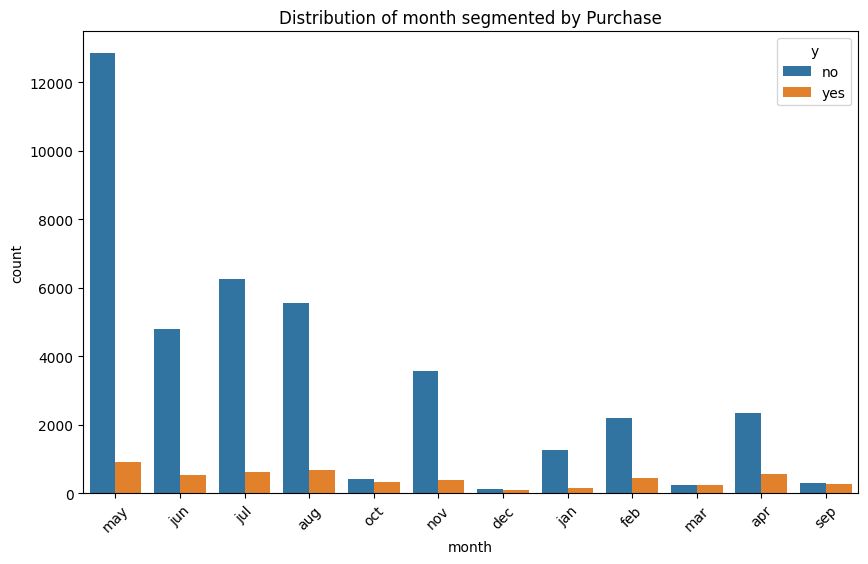

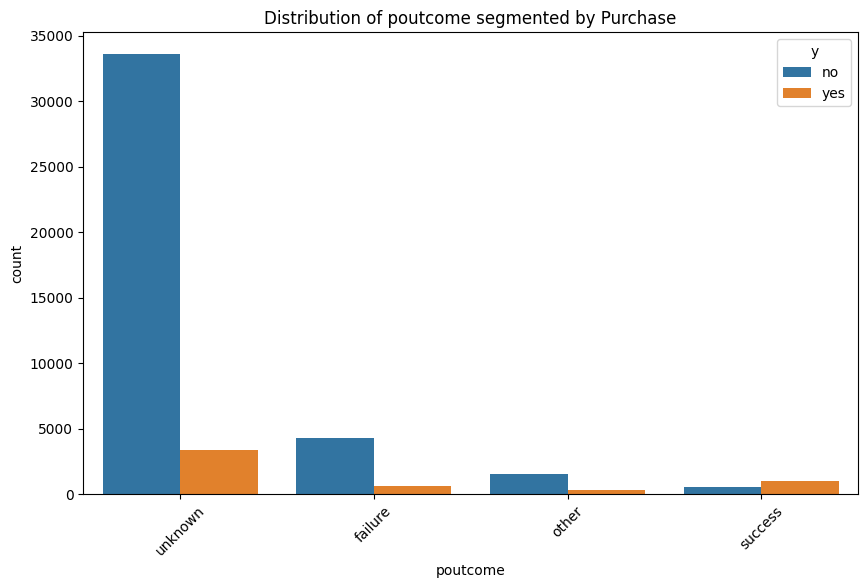

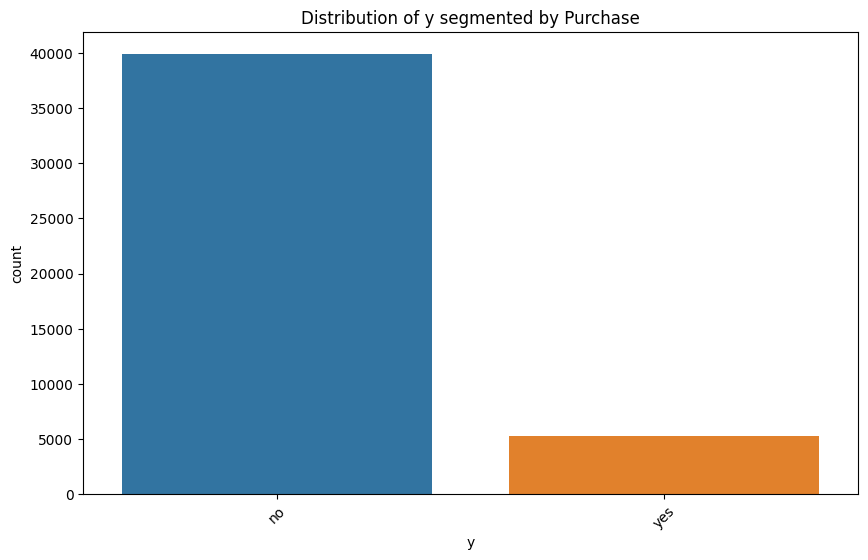

In [9]:
# Bar Plots for Original Categorical Features (before encoding)
categorical_columns = original_bank_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='y', data=original_bank_data)
    plt.title(f'Distribution of {column} segmented by Purchase')
    plt.xticks(rotation=45)
    plt.show()

### Pair Plot on a Sample of the Original Data (to save resources)

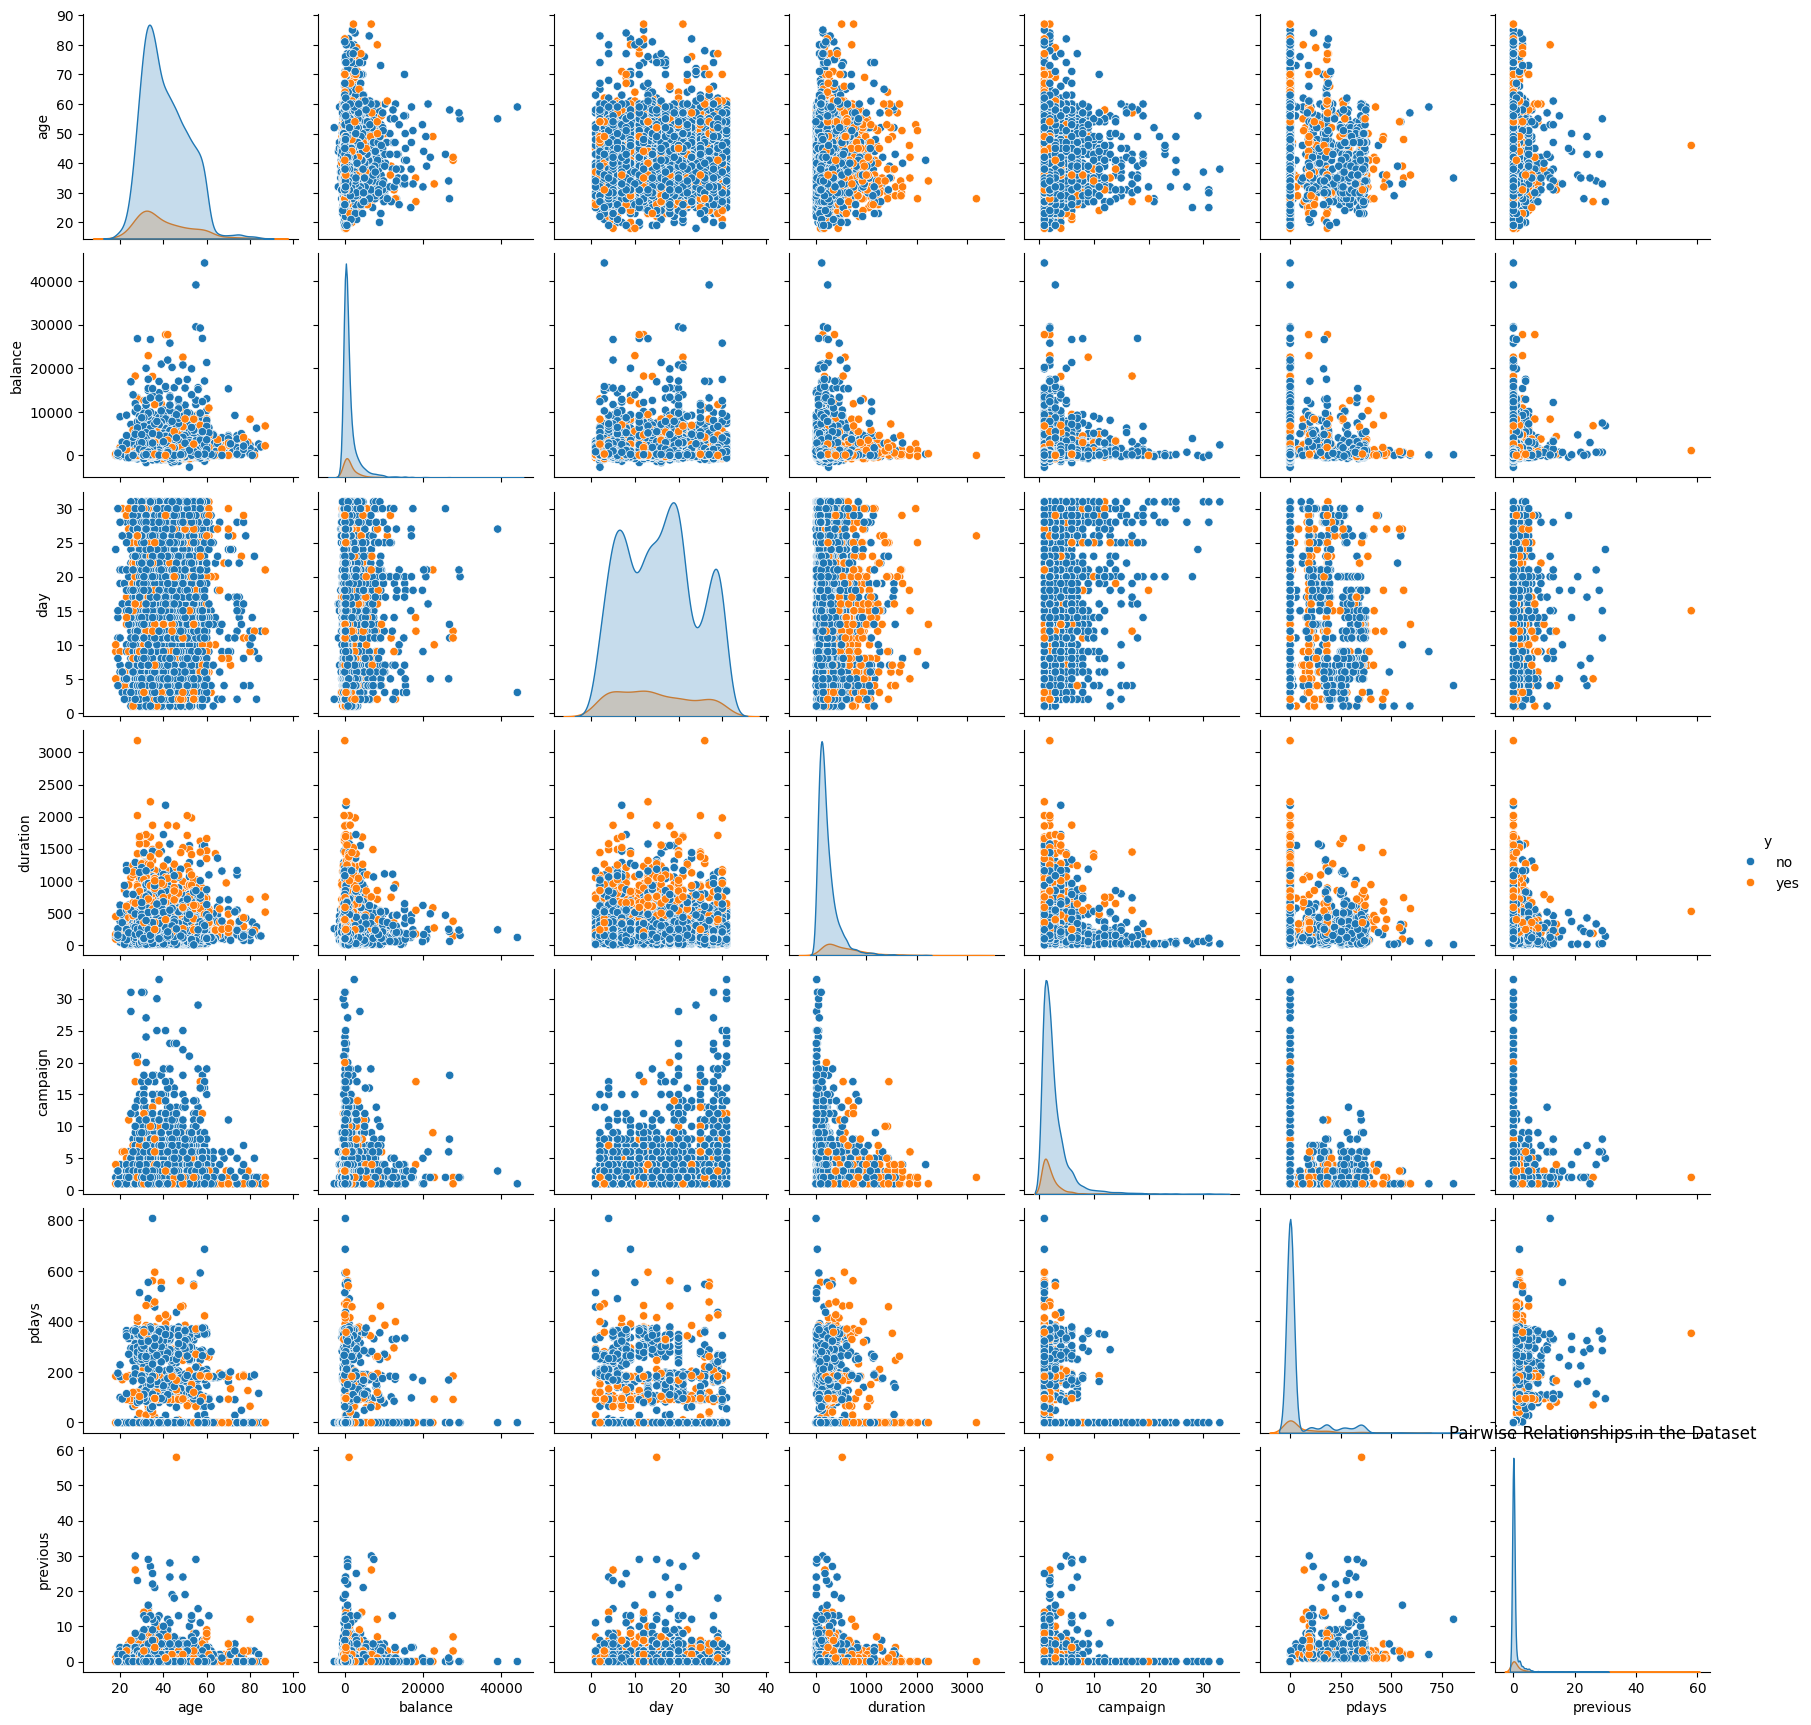

In [10]:
# Pair Plot on a Sample of the Original Data (to save resources)
sample_data = original_bank_data.sample(frac=0.1, random_state=42)
sns.pairplot(sample_data, hue='y')
plt.title('Pairwise Relationships in the Dataset')
plt.show()

### Box Plots for Numeric Features

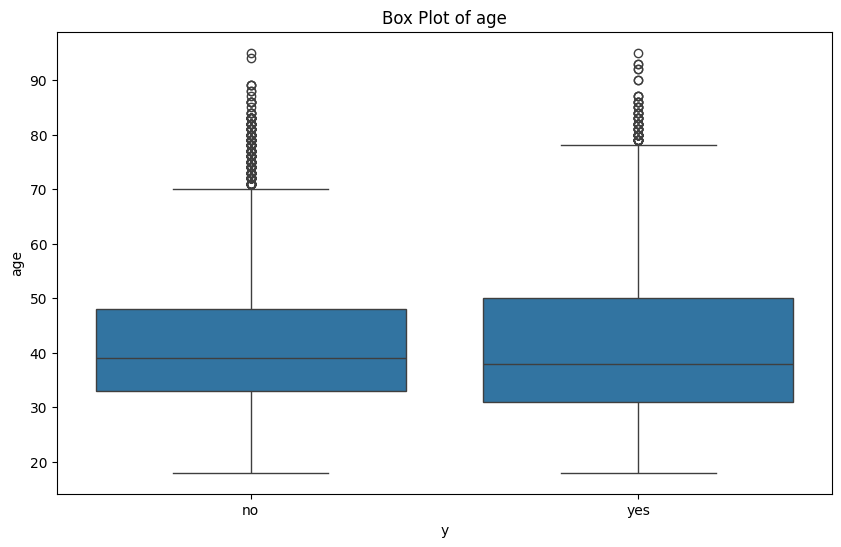

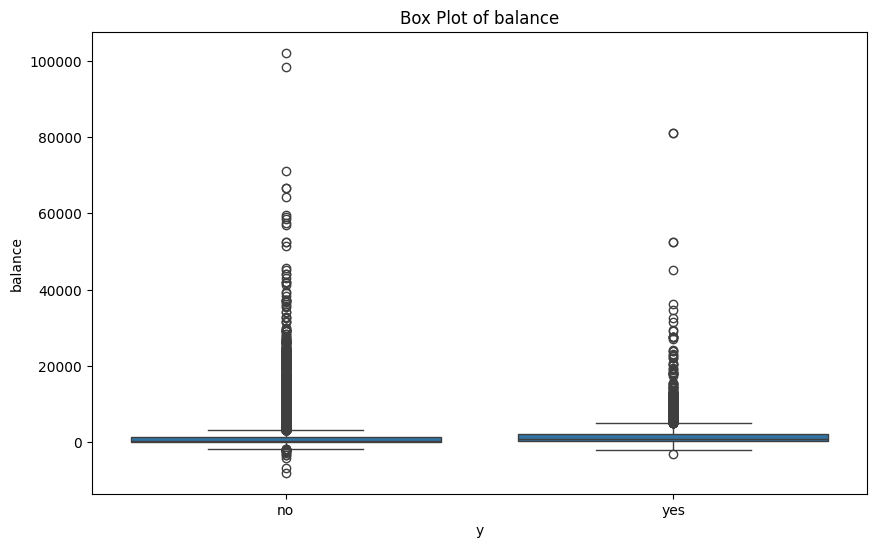

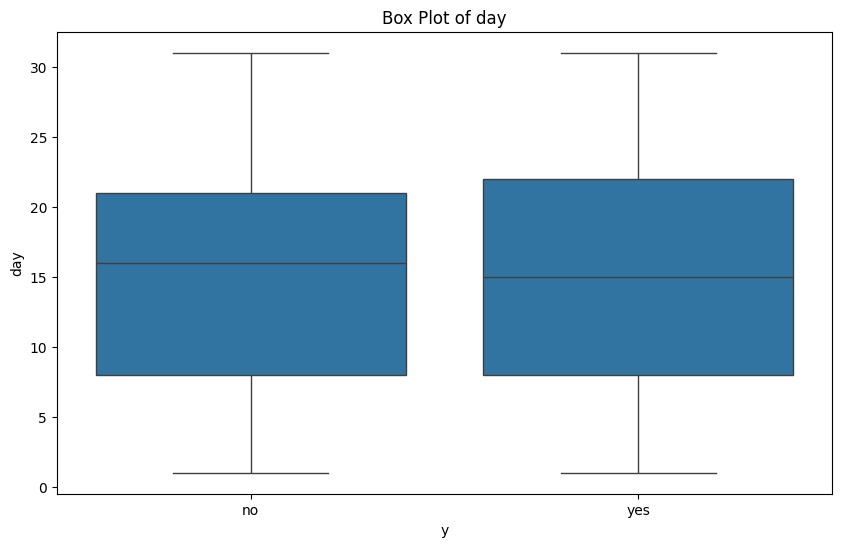

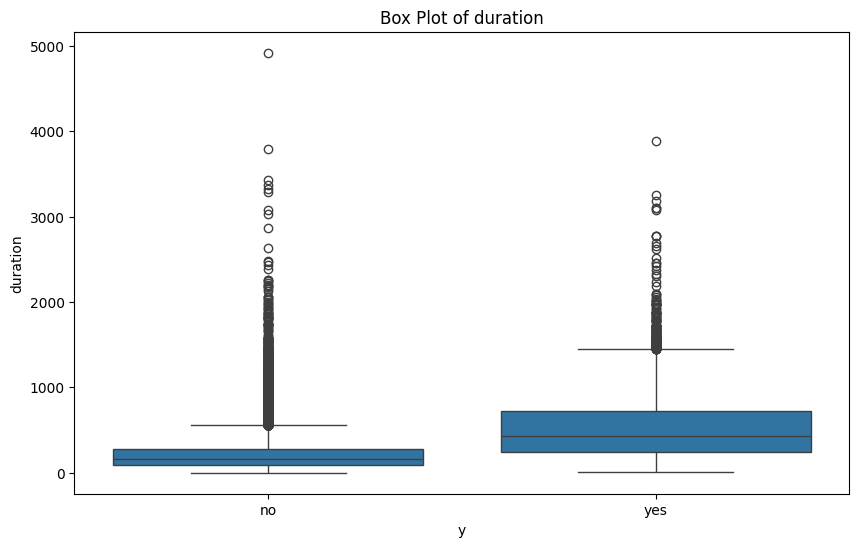

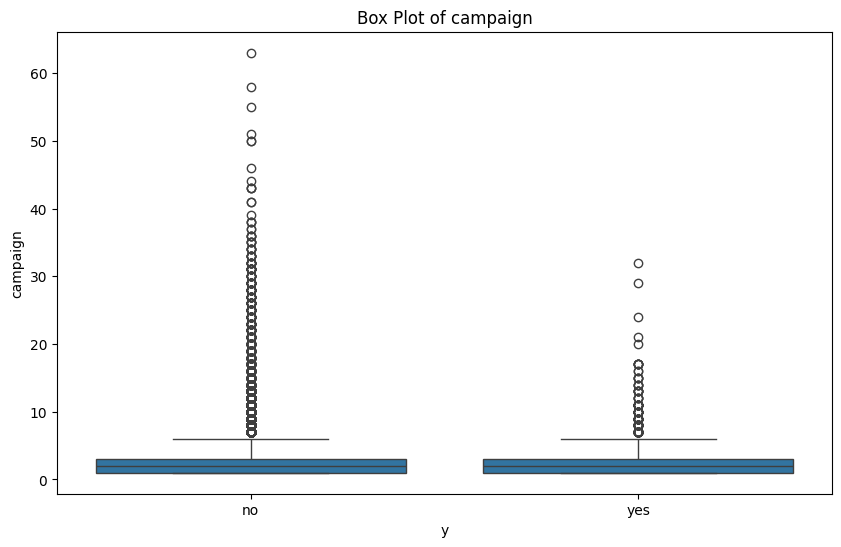

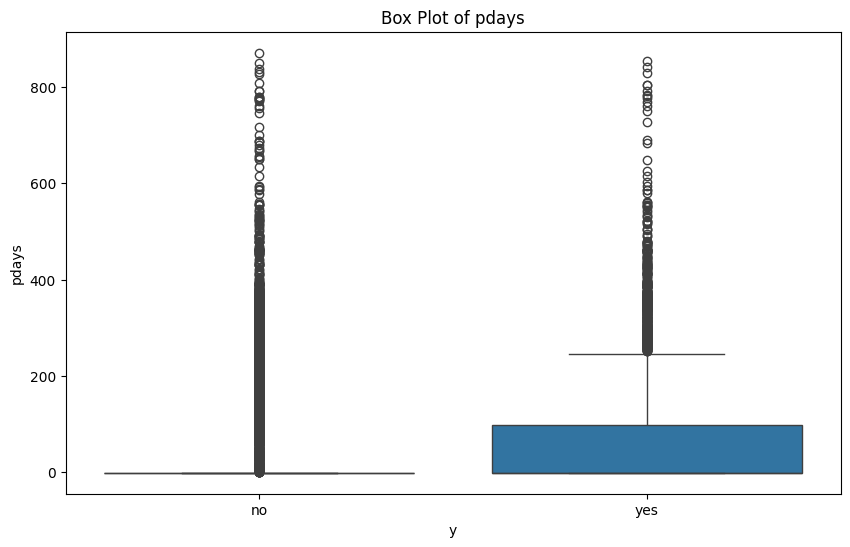

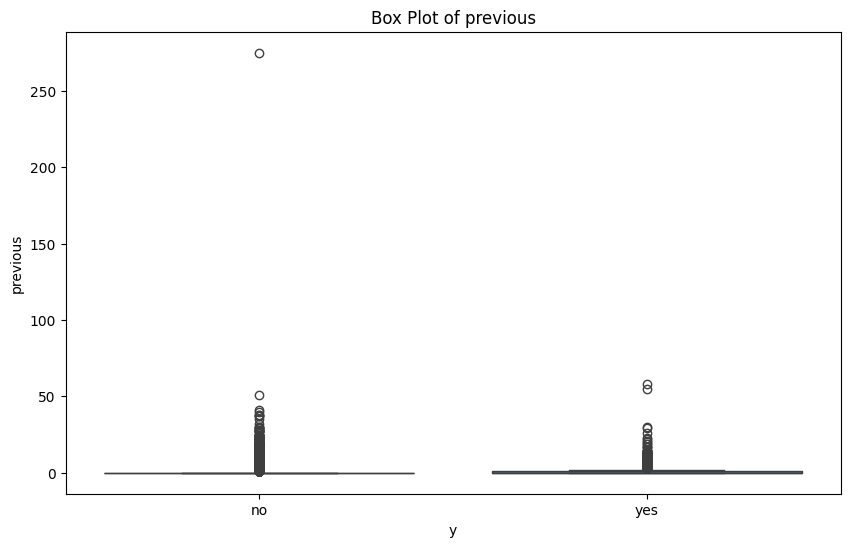

In [11]:
# Box Plots for Numeric Features
numeric_columns = bank_data.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=column, data=bank_data)
    plt.title(f'Box Plot of {column}')
    plt.show()

### Count Plot for the Target Variable

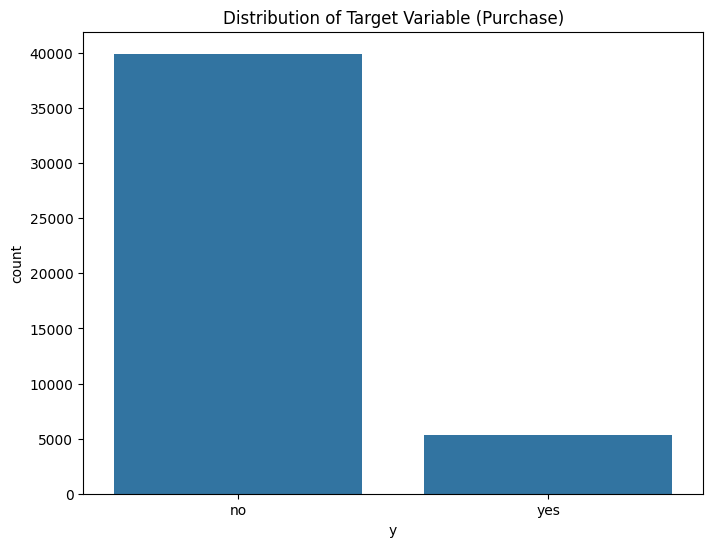

In [12]:
# Count Plot for the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=bank_data)
plt.title('Distribution of Target Variable (Purchase)')
plt.show()

# Data Preprocessing: Encoding Categorical Variables and Scaling

In [13]:
# Data Preprocessing: Encoding Categorical Variables and Scaling
label_encoders = {}
for column in bank_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    bank_data[column] = label_encoders[column].fit_transform(bank_data[column])

# Correlation Heatmap

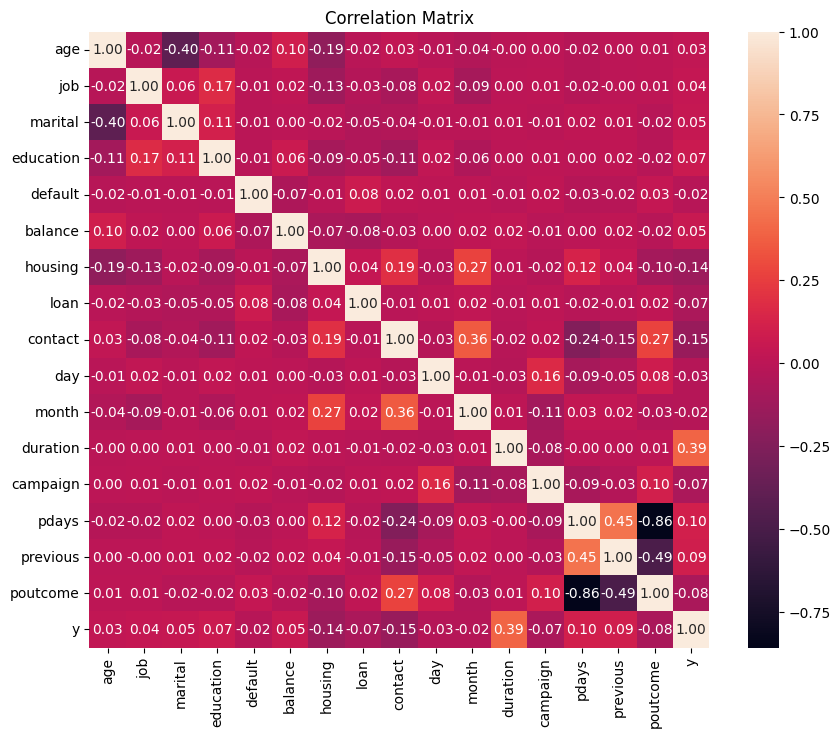

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(bank_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scaling the features

In [15]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(bank_data.drop('y', axis=1))

# Model Preparation: Splitting the Data

In [16]:
# Model Preparation: Splitting the Data
X = scaled_features
y = bank_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [17]:
# Model Building
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}
accuracy_scores = {}

# Training and Predicting

In [18]:
# Training and Predicting
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, predictions)
    print(f"Classification Report for {name}:\n", classification_report(y_test, predictions))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9

# Displaying Accuracy Scores in a Table

In [19]:
# Displaying Accuracy Scores in a Table
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])
accuracy_df

,Model,Accuracy Score
0,Decision Tree,0.873162
1,Random Forest,0.900586
2,Logistic Regression,0.887980


# Feature Importance Plot for Random Forest

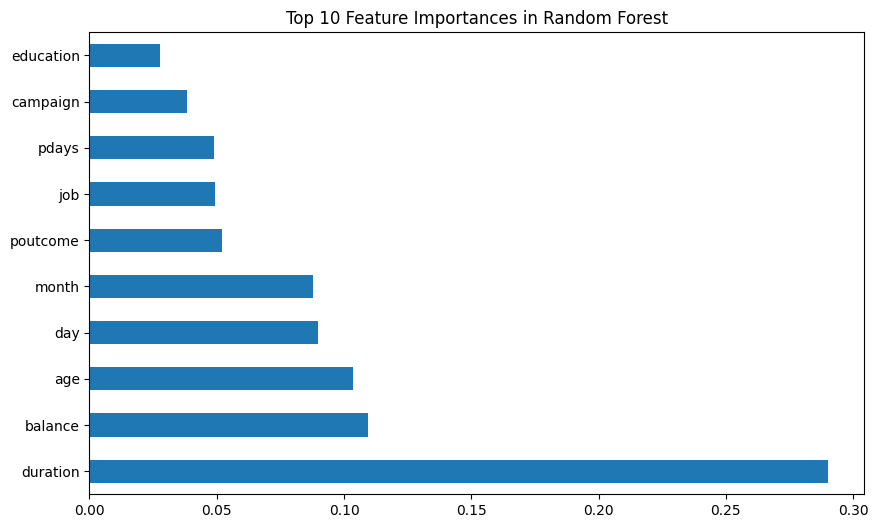

In [20]:
# Feature Importance Plot for Random Forest
plt.figure(figsize=(10, 6))
feature_names = bank_data.drop('y', axis=1).columns
feature_importances = pd.Series(models['Random Forest'].feature_importances_, index=feature_names)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()

# Feature Importance Plot for Decision Tree

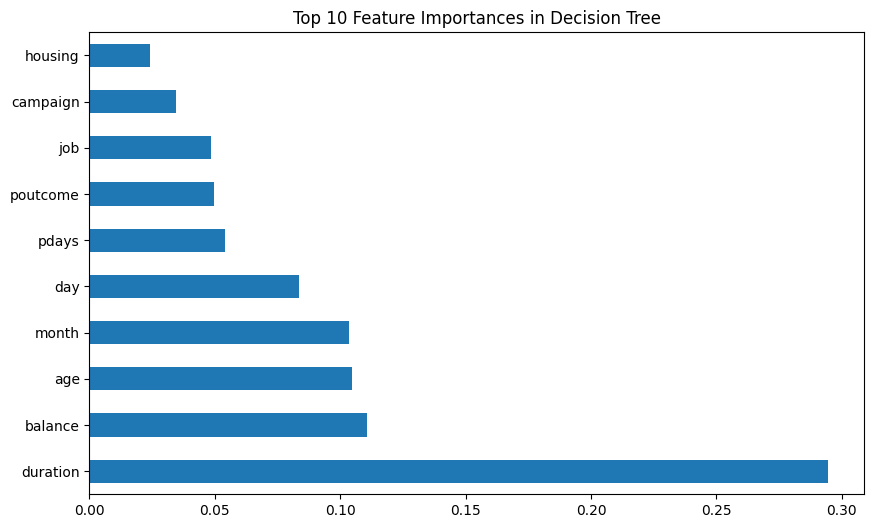

In [21]:
# Feature Importance Plot for Decision Tree
plt.figure(figsize=(10, 6))
feature_names = bank_data.drop('y', axis=1).columns
decision_tree_importances = pd.Series(models['Decision Tree'].feature_importances_, index=feature_names)
decision_tree_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.show()

# Visualize the simplified Decision Tree

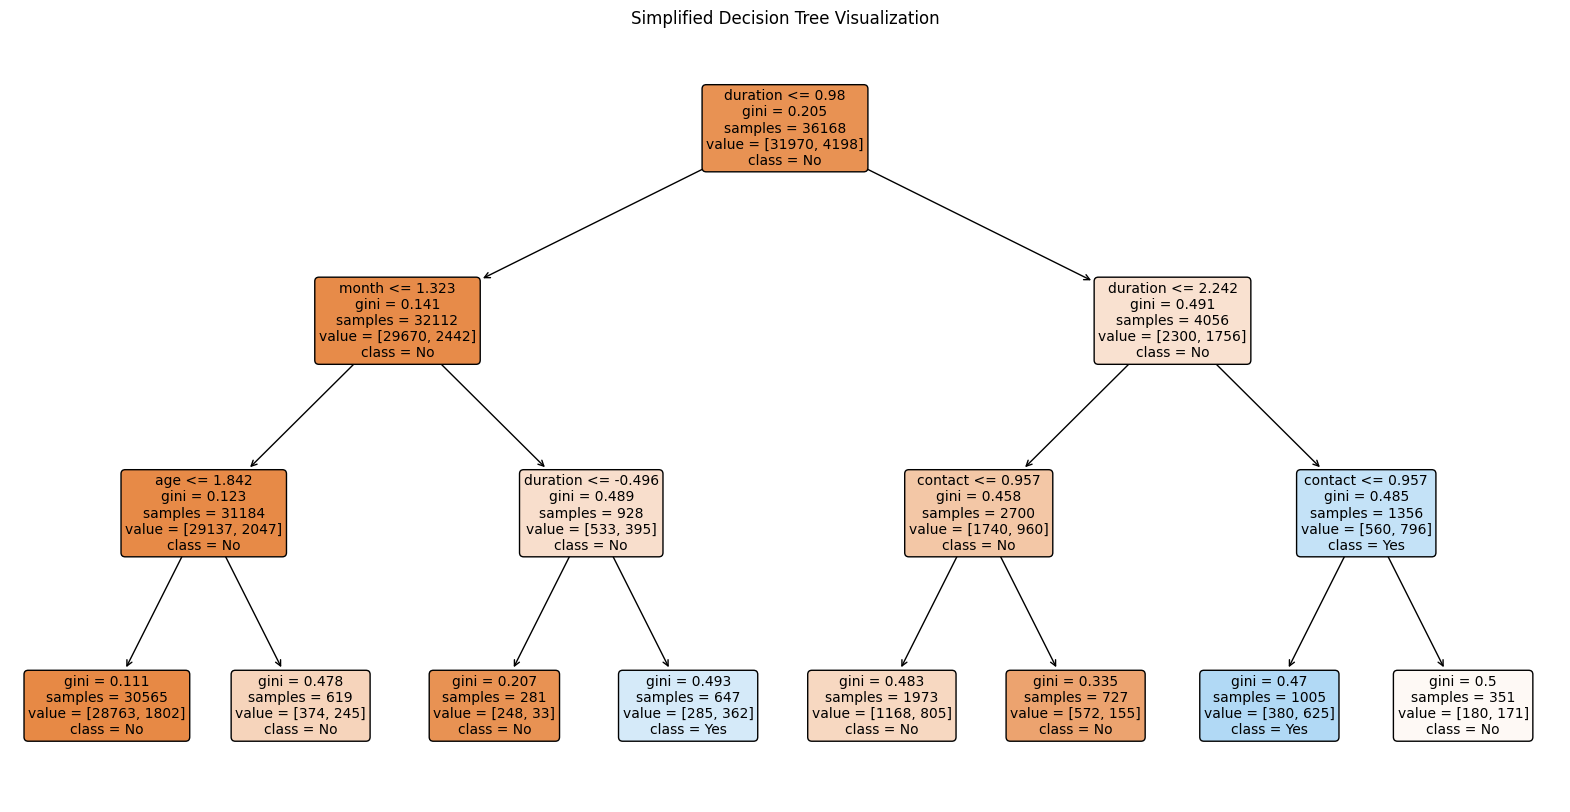

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creating a simplified Decision Tree model with limited depth
simple_dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
simple_dt_classifier.fit(X_train, y_train)

# Visualize the simplified Decision Tree
plt.figure(figsize=(20,10))
plot_tree(simple_dt_classifier, filled=True, feature_names=feature_names, class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.title('Simplified Decision Tree Visualization')
plt.show()